# The Codes for Continuous Time Finance Final Project


## Group Member: Bihan Li, Yixin Cheng, Keran Wang, Peiyu Wang, Yuxuan Zhao

In [ ]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import time

# Stock Data Extraction

In [143]:
# import yf data， compute sigma
start_date = datetime.datetime.strptime('2024-01-15', "%Y-%m-%d").date()
end_date = datetime.datetime.strptime('2024-07-15', "%Y-%m-%d").date()
ticker_symbol = ['AAPL','LLY']

In [144]:
def stock_data_preparation(start_date, end_date, ticker):
    data = yf.download(ticker, start=start_date, end=end_date)[["Adj Close"]]
    #data = data.to_frame()
    data = data.reset_index()
    data['Date'] = pd.to_datetime(data['Date']).dt.date
    data["ret"] = data['Adj Close'].pct_change()
    data.dropna(inplace = True)
    sigma= np.std(data['ret'])
    return data, sigma

In [145]:
data_A, sigma_A = stock_data_preparation(start_date, end_date,'AAPL')

[*********************100%%**********************]  1 of 1 completed


In [146]:
data_L, sigma_L = stock_data_preparation(start_date, end_date,'LLY')

[*********************100%%**********************]  1 of 1 completed


# BS Formula Set up

In [147]:
# Black-Scholes formula
def black_scholes(S0, K, T, r, d, sigma):
    d1 = (np.log(S0 / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * np.exp(-d * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put_price = - S0 * np.exp(-d * T) * norm.cdf(-d1) + K * np.exp(-r * T) * norm.cdf(-d2)
    digital_call_price = np.exp(-r * T) * norm.cdf(d2)
    digital_put_price = np.exp(-r * T) * norm.cdf(-d2)
    bond_price = 100 * np.exp(-r * T)
    put_call_parity = np.isclose(call_price + K/100 * bond_price, put_price + S0 * np.exp(-d * T))
    return call_price, put_price, digital_call_price, digital_put_price, bond_price, put_call_parity

def BS_chain(S0, K_range, T, r, d, sigma):
    results = []
    for K in K_range:
        VC, VP, DC, DP, BP, PCP = black_scholes(S0, K, T, r, d, sigma)
        results.append((K, VC, VP, DC, DP, BP, PCP))
    df = pd.DataFrame(results, columns=['K', 'VC', 'VP', 'DC', 'DP', 'BP', 'Put-Call Parity'])
    return df


pd.set_option('display.float_format', '{:.6f}'.format)
np.set_printoptions(suppress=True)


## BS Calculation

In [148]:
# AAPL Parameters
S0A = 230.45 #later on input AAPL AND LLY PRC
K_range = np.arange(200, 360, 10) 
#K = 230 
T = 0.5 # substitute 0.5/ other?
r = 0.05 #fed now 
d = 0.0043 # dividend, last year/this year
sigma = sigma_A*10 #historical sigma


AAPL = BS_chain(S0A, K_range, T, r, d, sigma)   
AAPL 

,K,VC,VP,DC,DP,BP,Put-Call Parity
0,200,35.582198,0.689116,0.902305,0.073005,97.530991,True
1,210,26.937814,1.797831,0.819902,0.155408,97.530991,True
2,220,19.312684,3.925800,0.699441,0.275869,97.530991,True
3,230,13.034519,7.400734,0.553640,0.421670,97.530991,True
4,240,8.252151,12.371465,0.404117,0.571193,97.530991,True
5,250,4.894451,18.766865,0.271602,0.703707,97.530991,True
6,260,2.721306,26.346818,0.168371,0.806939,97.530991,True
7,270,1.421244,34.799855,0.096637,0.878673,97.530991,True
8,280,0.699302,43.831012,0.051600,0.923710,97.530991,True
9,290,0.325306,53.210116,0.025768,0.949542,97.530991,True


In [149]:
# LLY Parameters
S0L = data_L.iloc[-1,1] #later on input AAPL AND LLY PRC
K_range = np.arange(820, 1200, 10) 
T = 0.5 # substitute 0.5/ other?
r = 0.05 #fed now 
d = 0.0055 # dividend, last year/this year
sigma = sigma_L*10 #historical sigma

LLY = BS_chain(S0L, K_range, T, r, d, sigma)   
LLY


,K,VC,VP,DC,DP,BP,Put-Call Parity
0,820,148.825622,2.784243,0.903856,0.071454,97.530991,True
1,830,139.865076,3.576796,0.887881,0.087429,97.530991,True
2,840,131.075603,4.540421,0.869629,0.105681,97.530991,True
3,850,122.480281,5.698199,0.849045,0.126265,97.530991,True
4,860,114.102491,7.073509,0.826125,0.149185,97.530991,True
5,870,105.965423,8.689539,0.800913,0.174397,97.530991,True
6,880,98.091556,10.568771,0.773505,0.201805,97.530991,True
7,890,90.502150,12.732464,0.744049,0.231260,97.530991,True
8,900,83.216749,15.200162,0.712741,0.262569,97.530991,True
9,910,76.252728,17.989240,0.679816,0.295494,97.530991,True


# Consistrency Check

In [150]:
AAPL_check = AAPL.copy()
LLY_check = LLY.copy()

## Put call Parity

In [151]:
all_true = AAPL_check['Put-Call Parity'].all()

if all_true:
    print("There are no false values in the put call parity.")
else:
    print("There are false values in the put call parity.")

There are no false values in the put call parity.


In [152]:
all_true = LLY_check['Put-Call Parity'].all()

if all_true:
    print("There are no false values in the put call parity.")
else:
    print("There are false values in the put call parity.")

There are no false values in the put call parity.


## Call price monotone decreasing and convex

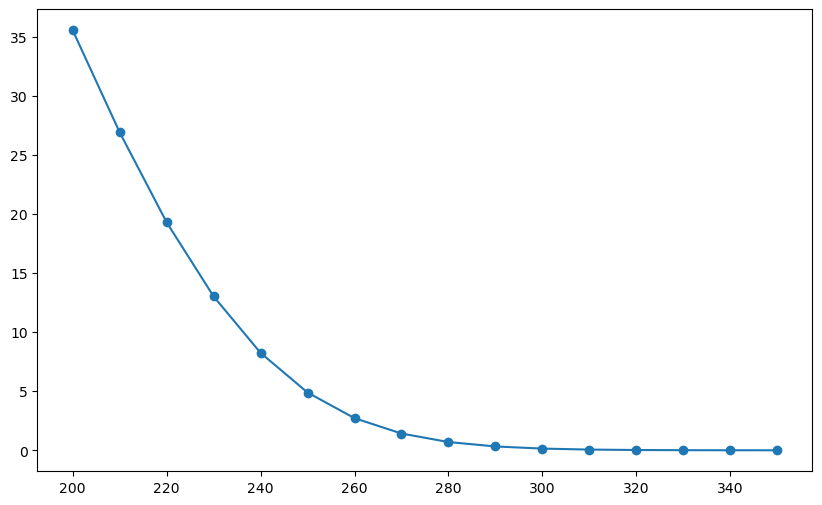

In [153]:
plt.figure(figsize=(10, 6))
# Plot Call and Put prices
plt.plot(AAPL_check['K'], AAPL_check['VC'], label='Call Price', marker='o')
#plt.plot(AAPL['K'], AAPL['VP'], label='Put Price', marker='o')

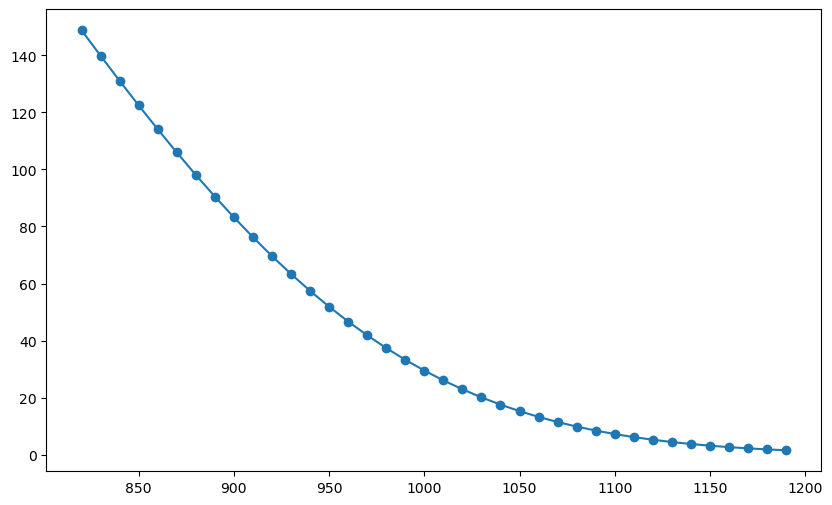

In [154]:
plt.figure(figsize=(10, 6))

# Plot Call and Put prices
plt.plot(LLY_check['K'], LLY_check['VC'], label='Call Price', marker='o')

## Call price range check

In [155]:
AAPL_check['range_check'] = AAPL_check.apply(
    lambda row: ((- row['VC'] + S0A) * (- row['VC'] + S0A - row['K'] /100 * row['BP'])) < 0,
    axis=1
)
all_true = AAPL_check['range_check'].all()
AAPL_check

if all_true:
    print("There are no false values in the range_check column.")
else:
    print("There are false values in the range_check column.")


There are no false values in the range_check column.


In [156]:
LLY_check['range_check'] = LLY_check.apply(
    lambda row: ((- row['VC'] + S0L) * (- row['VC'] + S0L -  row['K'] /100 * row['BP'])) < 0,
    axis=1
)
LLY_check
all_true = LLY_check['range_check'].all()

if all_true:
    print("There are no false values in the range_check column.")
else:
    print("There are false values in the range_check column.")



There are no false values in the range_check column.


## call spread check

In [157]:
AAPL_check['VC_range'] = AAPL_check['VC'] - AAPL_check['VC'].shift(1)
AAPL_check['c_spread_check'] = AAPL_check.apply(
    lambda row: (row['VC_range'] -row['DC']*100) < 0.5,
    axis=1
)

AAPL_check

,K,VC,VP,DC,DP,BP,Put-Call Parity,range_check,VC_range,c_spread_check
0,200,35.582198,0.689116,0.902305,0.073005,97.530991,True,True,NaN,False
1,210,26.937814,1.797831,0.819902,0.155408,97.530991,True,True,-8.644384,True
2,220,19.312684,3.925800,0.699441,0.275869,97.530991,True,True,-7.625130,True
3,230,13.034519,7.400734,0.553640,0.421670,97.530991,True,True,-6.278165,True
4,240,8.252151,12.371465,0.404117,0.571193,97.530991,True,True,-4.782368,True
5,250,4.894451,18.766865,0.271602,0.703707,97.530991,True,True,-3.357700,True
6,260,2.721306,26.346818,0.168371,0.806939,97.530991,True,True,-2.173146,True
7,270,1.421244,34.799855,0.096637,0.878673,97.530991,True,True,-1.300062,True
8,280,0.699302,43.831012,0.051600,0.923710,97.530991,True,True,-0.721942,True
9,290,0.325306,53.210116,0.025768,0.949542,97.530991,True,True,-0.373996,True


In [158]:
LLY_check['VC_range'] = LLY_check['VC'] - LLY_check['VC'].shift(1)
LLY_check['c_spread_check'] = LLY_check.apply(
    lambda row: (row['VC_range'] -row['DC']*100) < 0.5,
    axis=1
)

LLY_check

,K,VC,VP,DC,DP,BP,Put-Call Parity,range_check,VC_range,c_spread_check
0,820,148.825622,2.784243,0.903856,0.071454,97.530991,True,True,NaN,False
1,830,139.865076,3.576796,0.887881,0.087429,97.530991,True,True,-8.960546,True
2,840,131.075603,4.540421,0.869629,0.105681,97.530991,True,True,-8.789474,True
3,850,122.480281,5.698199,0.849045,0.126265,97.530991,True,True,-8.595322,True
4,860,114.102491,7.073509,0.826125,0.149185,97.530991,True,True,-8.377789,True
5,870,105.965423,8.689539,0.800913,0.174397,97.530991,True,True,-8.137069,True
6,880,98.091556,10.568771,0.773505,0.201805,97.530991,True,True,-7.873867,True
7,890,90.502150,12.732464,0.744049,0.231260,97.530991,True,True,-7.589406,True
8,900,83.216749,15.200162,0.712741,0.262569,97.530991,True,True,-7.285401,True
9,910,76.252728,17.989240,0.679816,0.295494,97.530991,True,True,-6.964021,True


## digital put call range check

In [159]:
AAPL_check['cpb_check'] = AAPL_check.apply(
    lambda row: (row['DC']*100 + row['DP']*100) == row['BP'],
    axis=1
)

AAPL_check
all_true = AAPL_check['cpb_check'].all()

if all_true:
    print("There are no false values in the digital put call and bond price check.")
else:
    print("There are no false values in the digital put call and bond price check.")


There are no false values in the digital put call and bond price check.


In [160]:
LLY_check['cpb_check'] = LLY_check.apply(
    lambda row: (row['DC']*100 + row['DP']*100) == row['BP'],
    axis=1
)

LLY_check
all_true = LLY_check['cpb_check'].all()

if all_true:
    print("There are no false values in the digital put call and bond price check.")
else:
    print("There are no false values in the digital put call and bond price check.")

There are no false values in the digital put call and bond price check.


## Volatility Check

In [161]:
def black_scholes_call(S0, K, T, r, d, sigma):
    d1 = (np.log(S0 / K) + (r - d + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * np.exp(-d * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def BS_vol_call(S0, K, T, r, d, sigma_range):
    results = []
    for sigma in sigma_range:
        VC = black_scholes_call(S0, K, T, r, d, sigma)
        results.append((sigma, VC))
    df = pd.DataFrame(results, columns=['Sigma', 'VC'])
    return df



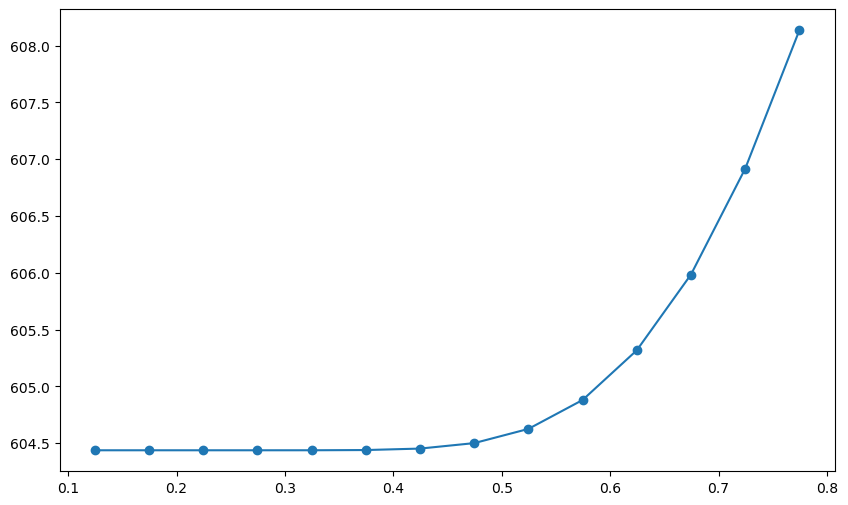

In [162]:
S0A = data_A.iloc[-1,1] #later on input AAPL AND LLY PRC
K = 350 
T = 0.5 # substitute 0.5/ other?
r = 0.05 #fed now 
d = 0.0055 # dividend, last year/this year
sigma_range = np.arange(sigma_A*10*0.8, sigma_A*10*5, 0.05) #historical sigma

AAPL_check2 = BS_vol_call(S0L, K, T, r, d, sigma_range)   
AAPL_check2

plt.figure(figsize=(10, 6))

# Plot Call and Put prices
plt.plot(AAPL_check2['Sigma'], AAPL_check2['VC'], label='Call Price', marker='o')

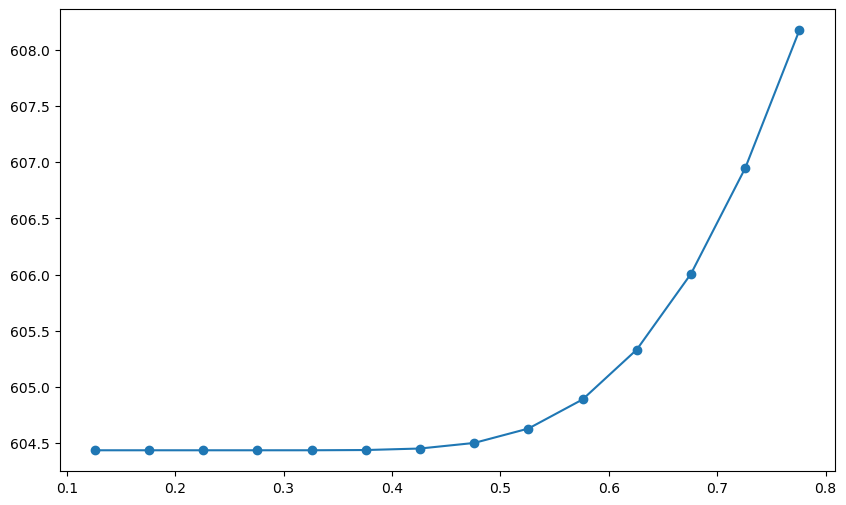

In [163]:
S0L = data_L.iloc[-1,1] #later on input AAPL AND LLY PRC
K = 350 
T = 0.5 # substitute 0.5/ other?
r = 0.05 #fed now 
d = 0.0055 # dividend, last year/this year
sigma_range = np.arange(sigma_L*10*0.8, sigma_L*10*5, 0.05) #historical sigma

LLY_check2 = BS_vol_call(S0L, K, T, r, d, sigma_range)   
LLY_check2

plt.figure(figsize=(10, 6))

# Plot Call and Put prices
plt.plot(LLY_check2['Sigma'], LLY_check2['VC'], label='Call Price', marker='o')

# Monte Carlo Simulation

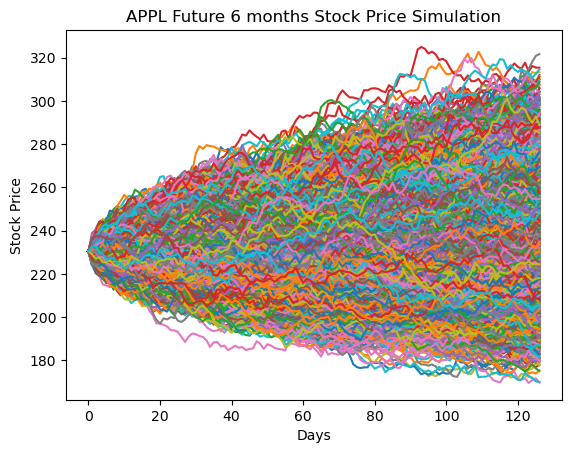

In [164]:
#Apple stock price 6 months prediction
#all these data are from former steps
S0A = 230.45 
T = 126 # substitute 0.5/ other?
rA = 0.05 #fed now 
dA = 0.0043 # dividend, last year/this year
sigmaAAPL = 0.1556
n_simulations = 10000 
STAAPL_ALL = []
for n in range(n_simulations):
    W = np.random.normal(0, 1, T)
    STAAPL = [S0A]
    for i in range(T):
        St_prev = STAAPL[-1]
        St = St_prev * np.exp((rA - dA) * (1/365) - 0.5 * (sigmaAAPL ** 2) * (1/365) + sigmaAAPL * np.sqrt(1/365) * W[i])
        STAAPL.append(St)
    STAAPL_ALL.append(STAAPL)
for i in range(n_simulations): 
    plt.plot(STAAPL_ALL[i], label=f'Simulation {i+1}')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('APPL Future 6 months Stock Price Simulation')
plt.show()
final_price_AAPL = STAAPL_ALL[-1]#ST

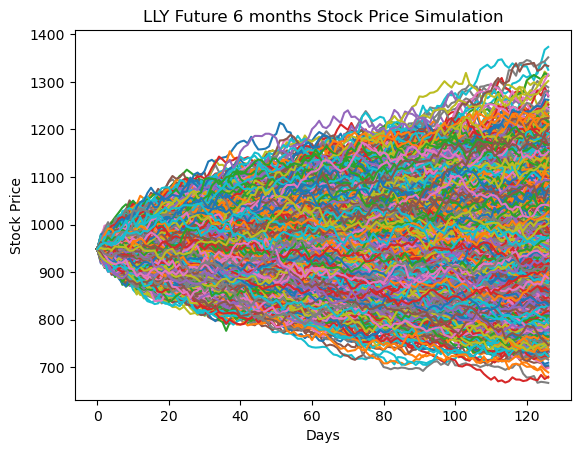

In [165]:
#LLY stock price 6 months prediction
#all these data are from former steps
S0L = 948.4 
T = 126 # 
rL = 0.05 #fed now 
dL = 0.0055 # dividend, last year/this year
sigmaLLY = 0.1573
STLLY_ALL = []
for n in range(n_simulations):
    W = np.random.normal(0, 1, T)
    STLLY = [S0L]
    for i in range(T):
        St_prev = STLLY[-1]
        St = St_prev * np.exp((rL - dL) * (1/365) - 0.5 * (sigmaLLY ** 2) * (1/365) + sigmaLLY * np.sqrt(1/365) * W[i])
        STLLY.append(St)
    n = n+1
    STLLY_ALL.append(STLLY)
for i in range(n_simulations): 
    plt.plot(STLLY_ALL[i], label=f'Simulation {i+1}')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('LLY Future 6 months Stock Price Simulation')
plt.show()
final_price_LLY = STLLY_ALL[-1]#ST

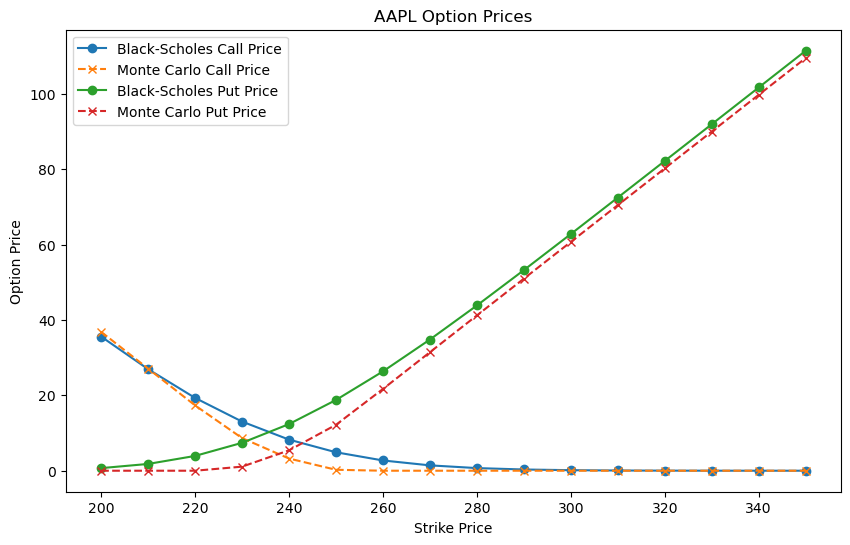

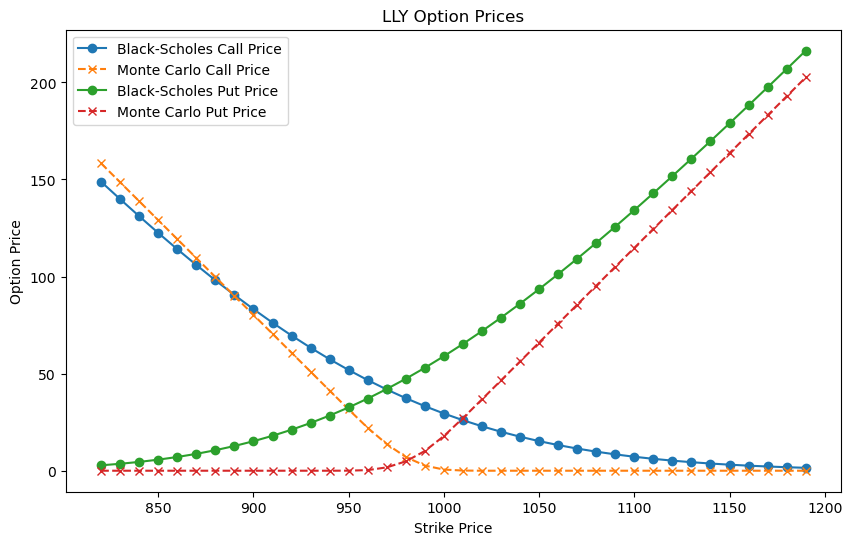

In [166]:
def monte_carlo_correct(K, T, r, d, sigma,final_prices,simulations=10000, steps=126):
    call_payoff = np.maximum(final_prices - K, 0)
    put_payoff = np.maximum(K - final_prices, 0)
    digital_call_payoff = (final_prices > K).astype(float)
    digital_put_payoff = (final_prices < K).astype(float)
    
    discount_factor = np.exp(-r * T)
    call_price = np.mean(call_payoff) * discount_factor
    put_price = np.mean(put_payoff) * discount_factor
    digital_call_price = np.mean(digital_call_payoff) * discount_factor
    digital_put_price = np.mean(digital_put_payoff) * discount_factor
    
    return call_price, put_price, digital_call_price, digital_put_price

def monte_carlo_chain_correct(K_range, T, r, d, sigma,final_prices, simulations=10000, steps=126):
    results = []
    for K in K_range:
        VC, VP, DC, DP = monte_carlo_correct(K, T, r, d, sigma,final_prices,simulations, steps)
        results.append((K, VC, VP, DC, DP))
    df = pd.DataFrame(results, columns=['K', 'VC', 'VP', 'DC', 'DP'])
    return df
#parameters
T=0.5
K_range_APPL = np.arange(200, 360, 10)
K_range_LLY = np.arange(820, 1200, 10)

# Euler Monte Carlo results for AAPL
AAPL_MC_correct = monte_carlo_chain_correct(K_range_APPL, T, rA, dA, sigmaAAPL,final_price_AAPL)
# Euler Monte Carlo results for LLY
LLY_MC_correct = monte_carlo_chain_correct(K_range_LLY, T, rL, dL, sigmaLLY,final_price_LLY)

# Plotting Euler Monte Carlo results for AAPL
plt.figure(figsize=(10, 6))
plt.plot(AAPL['K'], AAPL['VC'], label='Black-Scholes Call Price', marker='o')
plt.plot(AAPL_MC_correct['K'], AAPL_MC_correct['VC'], label='Monte Carlo Call Price', linestyle='--', marker='x')
plt.plot(AAPL['K'], AAPL['VP'], label='Black-Scholes Put Price', marker='o')
plt.plot(AAPL_MC_correct['K'], AAPL_MC_correct['VP'], label='Monte Carlo Put Price', linestyle='--', marker='x')
plt.legend()
plt.title('AAPL Option Prices')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.show()

# Plotting Euler Monte Carlo results for LLY
plt.figure(figsize=(10, 6))
plt.plot(LLY['K'], LLY['VC'], label='Black-Scholes Call Price', marker='o')
plt.plot(LLY_MC_correct['K'], LLY_MC_correct['VC'], label='Monte Carlo Call Price', linestyle='--', marker='x')
plt.plot(LLY['K'], LLY['VP'], label='Black-Scholes Put Price', marker='o')
plt.plot(LLY_MC_correct['K'], LLY_MC_correct['VP'], label='Monte Carlo Put Price', linestyle='--', marker='x')
plt.legend()
plt.title('LLY Option Prices')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.show()

## Stepping Method ( Euler stepping )

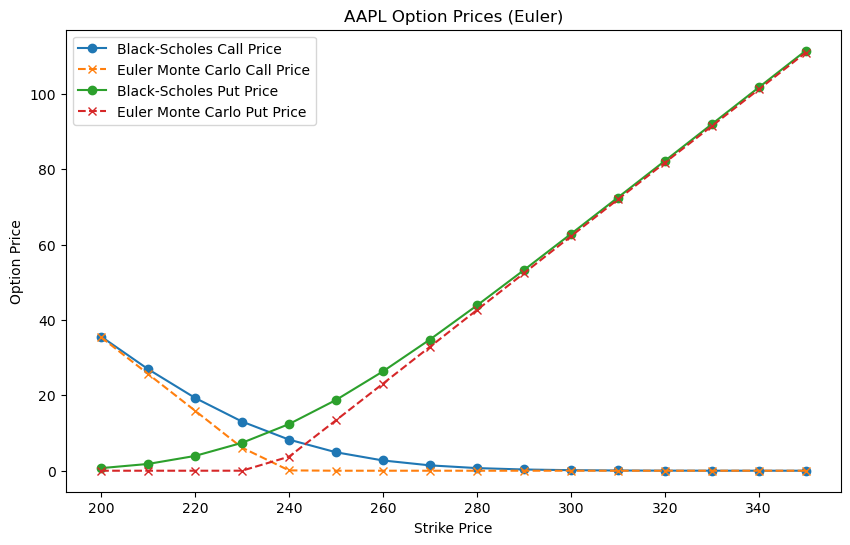

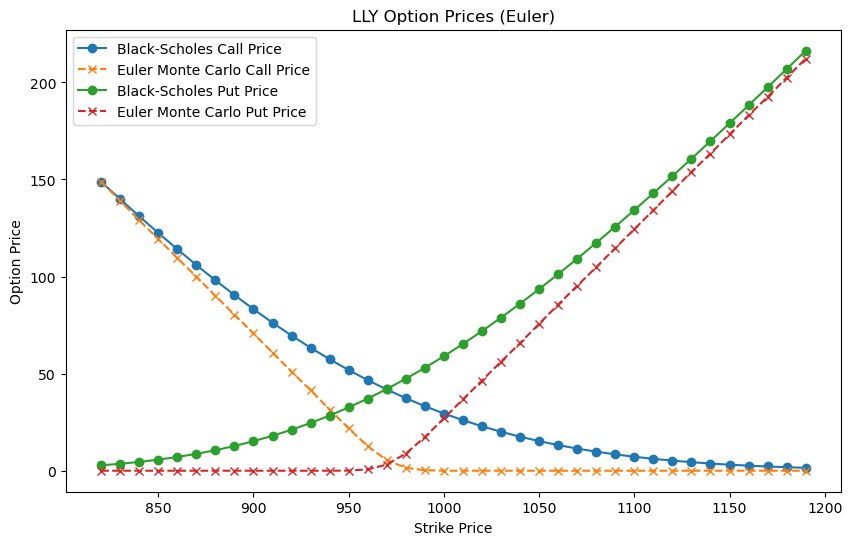

In [167]:

def euler_stepping(S0, r, d, sigma, T, steps, simulations):
    dt = T / steps
    prices = np.zeros((steps + 1, simulations))
    prices[0] = S0
    
    for t in range(1, steps + 1):
        W = np.random.standard_normal(simulations)
        prices[t] = prices[t-1] + r * prices[t-1] * dt + prices[t-1] * sigma * np.sqrt(dt) * W
        
    return prices[-1]

def euler_monte_carlo(S0, K, T, r, d, sigma, simulations=10000, steps=126):
    final_prices = euler_stepping(S0, r, d, sigma, T, steps, simulations)
    
    call_payoff = np.maximum(final_prices - K, 0)
    put_payoff = np.maximum(K - final_prices, 0)
    digital_call_payoff = (final_prices > K).astype(float)
    digital_put_payoff = (final_prices < K).astype(float)
    
    discount_factor = np.exp(-r * T)
    call_price = np.mean(call_payoff) * discount_factor
    put_price = np.mean(put_payoff) * discount_factor
    digital_call_price = np.mean(digital_call_payoff) * discount_factor
    digital_put_price = np.mean(digital_put_payoff) * discount_factor
    
    return call_price, put_price, digital_call_price, digital_put_price

def euler_monte_carlo_chain(S0, K_range, T, r, d, sigma, simulations=10000, steps=126):
    results = []
    for K in K_range:
        VC, VP, DC, DP = euler_monte_carlo(S0, K, T, r, d, sigma, simulations, steps)
        results.append((K, VC, VP, DC, DP))
    df = pd.DataFrame(results, columns=['K', 'VC', 'VP', 'DC', 'DP'])
    return df

# Parameters for AAPL
S0A = 230.45  # Current price of AAPL
K_range = np.arange(200, 360, 10)  # Strike price range
T = 0.5  # Time to maturity in years
r = 0.05  # Risk-free rate
d = 0.0043  # Dividend yield
sigma = sigma_A  # Historical volatility

# Parameters for LLY
S0L = data_L.iloc[-1, 1]  # Current price of LLY
K_range_LLY = np.arange(820, 1200, 10)  # Strike price range
d_LLY = 0.0055  # Dividend yield
sigma_L = sigma_L  # Historical volatility

# Euler Monte Carlo results for AAPL
AAPL_Euler_MC = euler_monte_carlo_chain(S0A, K_range, T, r, d, sigma)
# Euler Monte Carlo results for LLY
LLY_Euler_MC = euler_monte_carlo_chain(S0L, K_range_LLY, T, r, d_LLY, sigma_L)

# Plotting Euler Monte Carlo results for AAPL
plt.figure(figsize=(10, 6))
plt.plot(AAPL['K'], AAPL['VC'], label='Black-Scholes Call Price', marker='o')
plt.plot(AAPL_Euler_MC_correct['K'], AAPL_Euler_MC_correct['VC'], label='Euler Monte Carlo Call Price', linestyle='--', marker='x')
plt.plot(AAPL['K'], AAPL['VP'], label='Black-Scholes Put Price', marker='o')
plt.plot(AAPL_Euler_MC_correct['K'], AAPL_Euler_MC_correct['VP'], label='Euler Monte Carlo Put Price', linestyle='--', marker='x')
plt.legend()
plt.title('AAPL Option Prices (Euler)')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.show()

# Plotting Euler Monte Carlo results for LLY
plt.figure(figsize=(10, 6))
plt.plot(LLY['K'], LLY['VC'], label='Black-Scholes Call Price', marker='o')
plt.plot(LLY_Euler_MC_correct['K'], LLY_Euler_MC_correct['VC'], label='Euler Monte Carlo Call Price', linestyle='--', marker='x')
plt.plot(LLY['K'], LLY['VP'], label='Black-Scholes Put Price', marker='o')
plt.plot(LLY_Euler_MC_correct['K'], LLY_Euler_MC_correct['VP'], label='Euler Monte Carlo Put Price', linestyle='--', marker='x')
plt.legend()
plt.title('LLY Option Prices (Euler)')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.show()


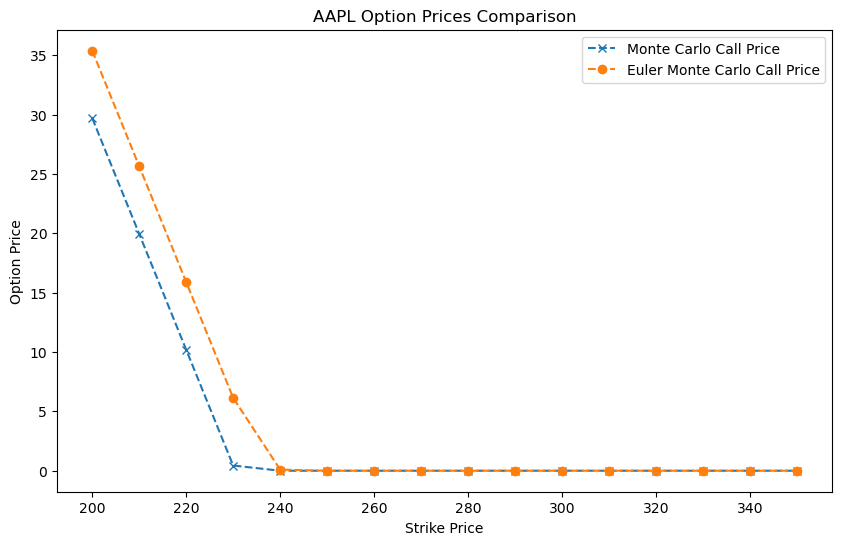

AAPL Monte Carlo method time: 0.0018 seconds
AAPL Euler Monte Carlo method time: 0.2662 seconds


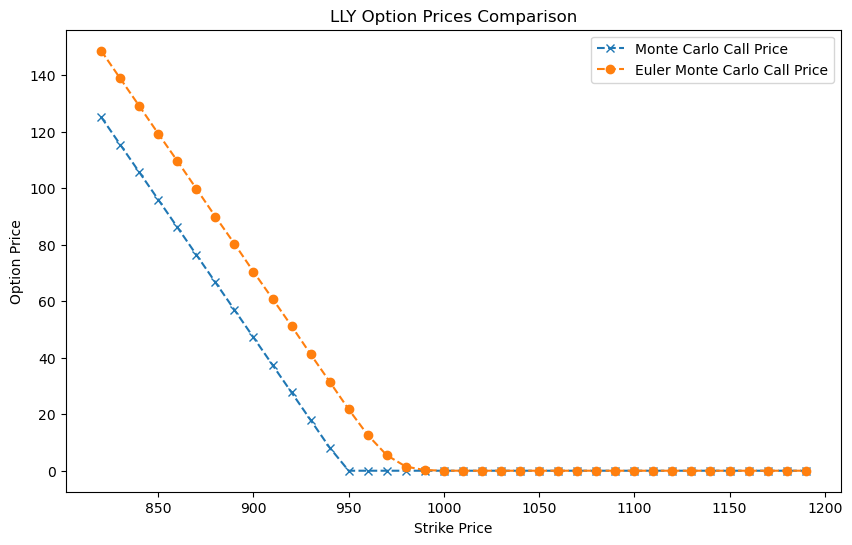

LLY Monte Carlo method time: 0.0005 seconds
LLY Euler Monte Carlo method time: 0.5617 seconds


In [170]:
def compare_methods(S0, K_range, T, r, d, sigma, simulations, steps):
    start_time = time.time()
    mc_results = monte_carlo_chain_correct(K_range, T, r, d, sigma, S0, simulations, steps)
    mc_time = time.time() - start_time

    start_time = time.time()
    euler_results = euler_monte_carlo_chain(S0, K_range, T, r, d, sigma, simulations, steps)
    euler_time = time.time() - start_time

    return mc_results, euler_results, mc_time, euler_time

# Parameters for AAPL
S0A = 230.45  # Current price of AAPL
K_range_APPL = np.arange(200, 360, 10)  # Strike price range
T = 0.5  # Time to maturity in years
rA = 0.05  # Risk-free rate
dA = 0.0043  # Dividend yield
sigmaAAPL = sigma_A  # Historical volatility

# Parameters for LLY
S0L = data_L.iloc[-1, 1]   # Current price of LLY 
K_range_LLY = np.arange(820, 1200, 10)  # Strike price range
rL = 0.05  # Risk-free rate
dL = 0.0055  # Dividend yield
sigmaLLY = sigma_L  # Historical volatility

# Compare methods for AAPL
AAPL_MC_correct, AAPL_Euler_MC, time_MC_AAPL, time_Euler_AAPL = compare_methods(
    S0A, K_range_APPL, T, rA, dA, sigmaAAPL, simulations=10000, steps=126
)

# Compare methods for LLY
LLY_MC_correct, LLY_Euler_MC, time_MC_LLY, time_Euler_LLY = compare_methods(
    S0L, K_range_LLY, T, rL, dL, sigmaLLY, simulations=10000, steps=126
)

# Plotting comparison for AAPL
plt.figure(figsize=(10, 6))
plt.plot(AAPL_MC_correct['K'], AAPL_MC_correct['VC'], label='Monte Carlo Call Price', linestyle='--', marker='x')
plt.plot(AAPL_Euler_MC['K'], AAPL_Euler_MC['VC'], label='Euler Monte Carlo Call Price', linestyle='--', marker='o')
plt.legend()
plt.title('AAPL Option Prices Comparison')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.show()

print(f"AAPL Monte Carlo method time: {time_MC_AAPL:.4f} seconds")
print(f"AAPL Euler Monte Carlo method time: {time_Euler_AAPL:.4f} seconds")

# Plotting comparison for LLY
plt.figure(figsize=(10, 6))
plt.plot(LLY_MC_correct['K'], LLY_MC_correct['VC'], label='Monte Carlo Call Price', linestyle='--', marker='x')
plt.plot(LLY_Euler_MC['K'], LLY_Euler_MC['VC'], label='Euler Monte Carlo Call Price', linestyle='--', marker='o')
plt.legend()
plt.title('LLY Option Prices Comparison')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.show()

print(f"LLY Monte Carlo method time: {time_MC_LLY:.4f} seconds")
print(f"LLY Euler Monte Carlo method time: {time_Euler_LLY:.4f} seconds")